# Project Foundations for Data Science: FoodHub Data Analysis

**Marks: 40**

**Name : TZUYU LIN, 林子羽**

**Email: lifeather1017@gmail.com**


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/MIT courses/Project Foundations for Data Science: FoodHub Data Analysis/foodhub_order.csv')
# returns the first 10 rows
df.head(10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,Not given,28,21
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5,21,26
9,1477311,39705,Bukhara Grill,Indian,7.18,Weekday,5,29,26


In [4]:
# returns the tail 10 rows
df.tail(10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1888,1477353,106324,The Meatball Shop,Italian,16.20,Weekend,5,21,26
1889,1478190,94152,RedFarm Broadway,Chinese,8.68,Weekday,3,33,30
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5,20,22
1891,1476981,138586,Shake Shack,American,5.82,Weekend,Not given,22,28
1892,1477473,97838,Han Dynasty,Chinese,29.15,Weekend,Not given,29,21
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


In [5]:
# returns the shape of datafame
df.shape

(1898, 9)

In [6]:
# check the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer. In the rating column, there are some values ​​that are not given, which may require data pre-processing.

### **Question 1:** How many rows and columns are present in the data?

In [7]:
# Get the number of rows and columns
number_rows, number_columns = df.shape
print(df.shape)
# Print the count of the row and columns
print(f'Number of rows: {number_rows}')
print(f'Number of columns: {number_columns}')

(1898, 9)
Number of rows: 1898
Number of columns: 9


#### Observations:
By using the df.shape, the dataFrame has 1898 rows and 9 cloumns.

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [8]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [9]:
data_types = df.dtypes
print('\nData types of different columns:')
print(data_types)


Data types of different columns:
order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object


#### Observations:
It show it has different datatype in the column. In the rating column, there are some values ​​that are 'not given'. Therefore, it becomes an 'object' in the data format.  But I think it should be changed to int(64). In the data analysis step, I will modify the data format.

total dtypes: float64(1), int64(4), object(4)

float64(1) : cost_of_the_order

int64(4) : order_id / customer_id/ food_preparation_time/8,   delivery_time

object(4) : restaurant_name/ cuisine_type/day_of_the_week/
rating

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [10]:
#check the missing values
if df.isnull().values.any():
    print('\nMissing values have been filled using mean:')
else:
    print('\nNo missing values in the data.')


No missing values in the data.


#### Observations:
No missing values in the data.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [11]:
# check the Statistical summary of the dataset
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [12]:
# check the Statistical summary of the 'food_preparation_time'
statistical_summary = df['food_preparation_time'].describe().T
print('\nStatistical summary of the data:')
print(statistical_summary[['min', 'mean', 'max']])


Statistical summary of the data:
min     20.00000
mean    27.37197
max     35.00000
Name: food_preparation_time, dtype: float64


#### Observations:
Based on the provided statistical summary of the data:

[food_preparation_time]

Minimum time: 20.00

Average time: 27.37

Maximum time: 35.00


### **Question 5:** How many orders are not rated?

In [13]:
# Data precleaning and check teh number of the order that is not rated
unrated_orders = df[df['rating'] == 'Not given'].shape[0]
print(f'\nNumber of orders not rated: {unrated_orders}')


Number of orders not rated: 736


#### Observations:
As the result abroved, the number of orders are not rated are 736.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

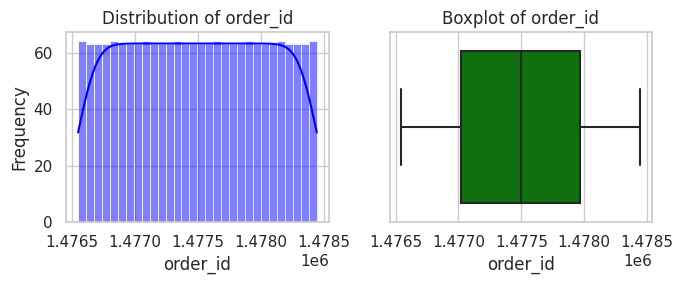

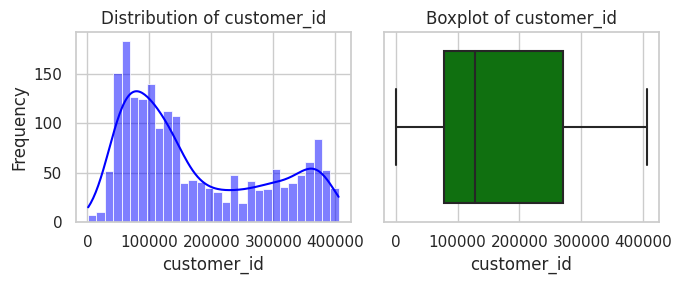

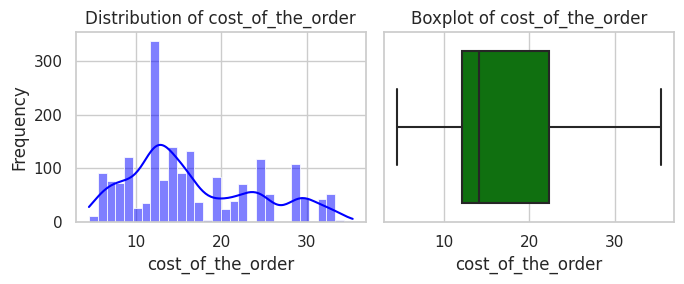

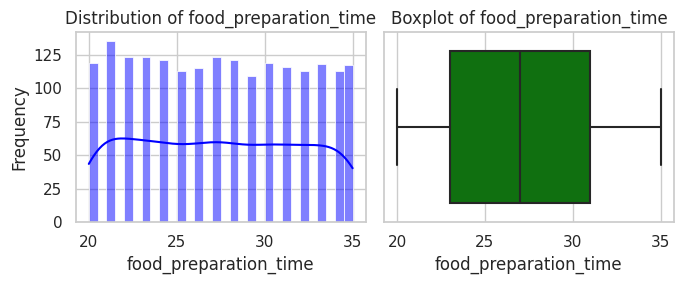

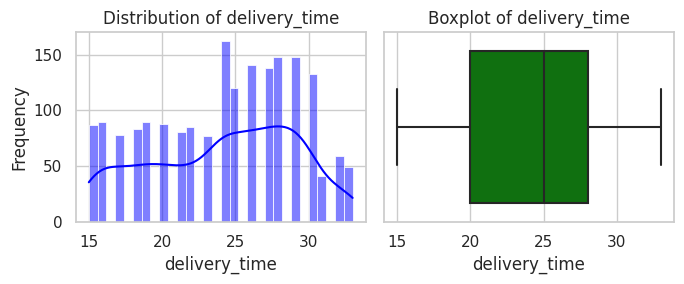

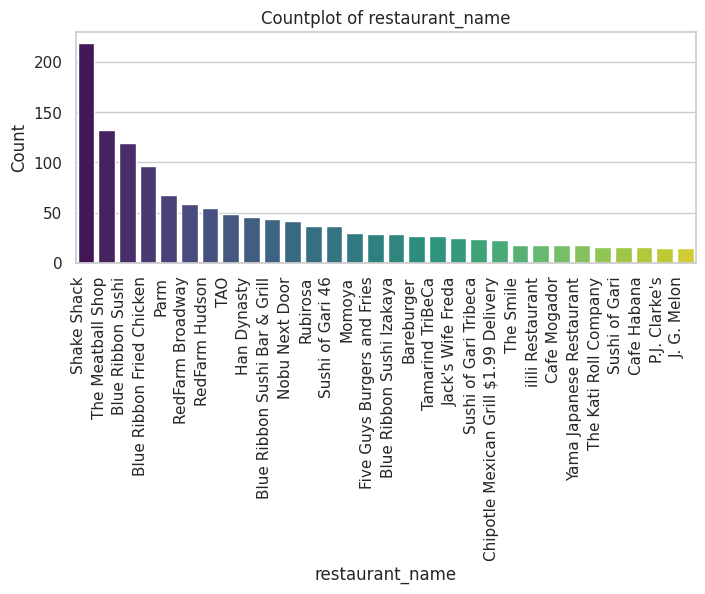

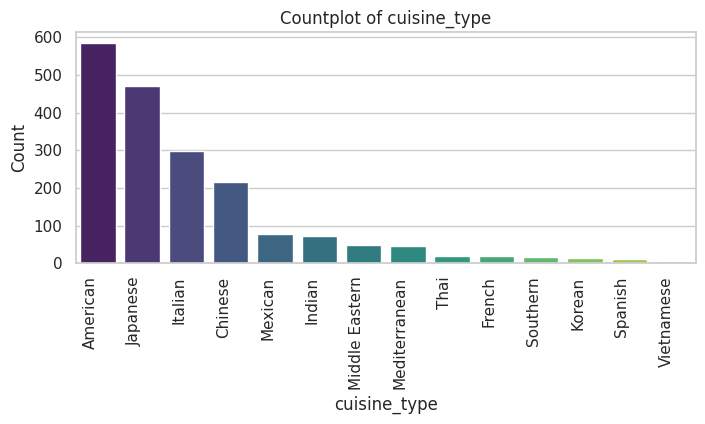

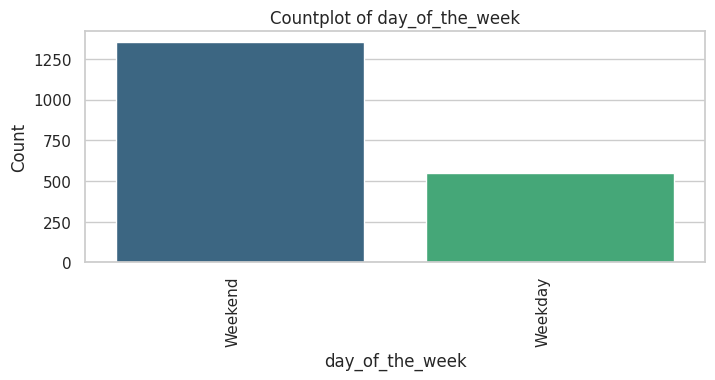

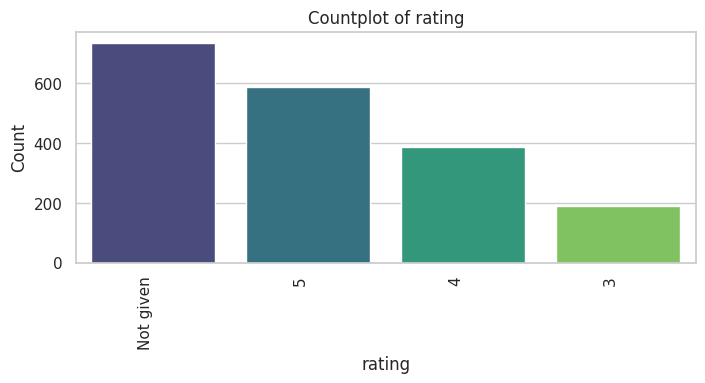

In [14]:
# Set the style for seaborn plots
sns.set(style="whitegrid")

# Univariate Analysis for Numerical Columns
numerical_columns = ['order_id', 'customer_id', 'cost_of_the_order', 'food_preparation_time', 'delivery_time']

for column in numerical_columns:
    # Create a subplot with 1 row and 2 columns
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

    # Histogram
    sns.histplot(df[column], kde=True, bins=30, color='blue', ax=axes[0])
    axes[0].set_title(f'Distribution of {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')

    # Boxplot
    sns.boxplot(x=df[column], color='green', ax=axes[1])
    axes[1].set_title(f'Boxplot of {column}')
    axes[1].set_xlabel(column)

    # Adjust layout and show the plt
    plt.tight_layout()
    plt.show()

# Univariate Analysis for Categorical Columns
categorical_columns = ['restaurant_name', 'cuisine_type', 'day_of_the_week', 'rating']

for column in categorical_columns:
    plt.figure(figsize=(8, 3))

    # Filter the top 30 categories
    top_categories = df[column].value_counts().nlargest(30).index

    sns.countplot(data=df[df[column].isin(top_categories)], x=column, order=top_categories, palette='viridis')
    plt.title(f'Countplot of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=90, ha='right')
    plt.show()

Observations:

Judging from the order ID data, there is no analyzable value. Looking at the customer ID, some customers order more than 150 times, and some order more than 100 times. According to the data seen in the cost of the order, our voucher consumption is 16.49 yuan. From the perspective of food preparation time, there is no significant difference. In terms of delivery time, the average time is 24.16min.

In the ranking of restaurant_name, Shake shack has the highest order time. In terms of the cuisine type that customers like most, American is the most popular. In terms of order of the week, weekend sales are relatively good.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?


Top 5 restaurants in terms of the number of orders received:
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64


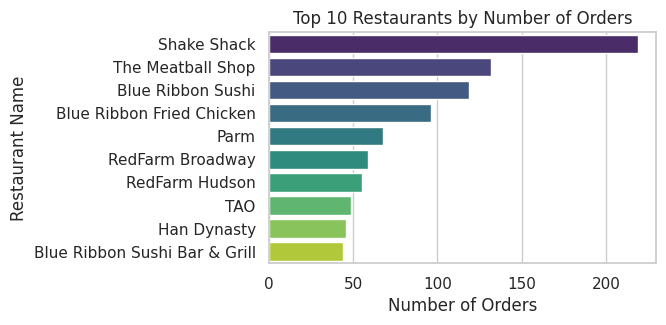

In [15]:
top_restaurants = df['restaurant_name'].value_counts().head(5)
print('\nTop 5 restaurants in terms of the number of orders received:')
print(top_restaurants)

# Create a countplot for the top 10 restaurants
top_10_restaurants = df['restaurant_name'].value_counts().head(10)
plt.figure(figsize=(5, 3))
sns.countplot(y=df['restaurant_name'], order=top_10_restaurants.index, palette='viridis')
plt.title('Top 10 Restaurants by Number of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Restaurant Name')
plt.show()

#### Observations:
Top 5 restaurants in terms of the number of orders received:
#####1.Shake Shack                  (219)
#####2.The Meatball Shop            (132)
#####3.Blue Ribbon Sushi            (119)
#####4.Blue Ribbon Fried Chicken     (96)
#####5.Parm                          (68)

### **Question 8**: Which is the most popular cuisine on weekends?

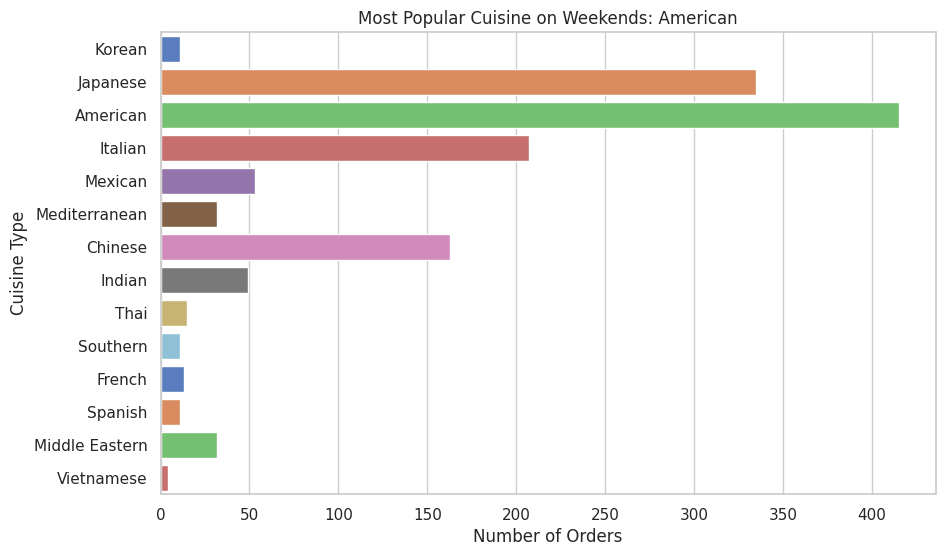

In [16]:
# Filter data for weekends
weekend_data = df[df['day_of_the_week'] == 'Weekend']

# Calculate the most popular cuisine on weekends
most_popular_cuisine = weekend_data['cuisine_type'].value_counts().idxmax()

# Create a countplot for the cuisine types on weekends
plt.figure(figsize=(10, 6))
sns.countplot(y=weekend_data['cuisine_type'], palette='muted')
plt.title(f'Most Popular Cuisine on Weekends: {most_popular_cuisine}')
plt.xlabel('Number of Orders')
plt.ylabel('Cuisine Type')
plt.show()

In [17]:
# Show the most popular cuisine on weekends
weekend_cuisine = df[df['day_of_the_week'].isin(['Weekend'])]['cuisine_type'].value_counts().idxmax()
print(f'\nThe most popular cuisine on weekends is: {weekend_cuisine}')


The most popular cuisine on weekends is: American


#### Observations:

The most popular cuisine on weekends is: American.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [18]:
percentage_above_20 = (df[df['cost_of_the_order'] > 20].shape[0] / df.shape[0]) * 100
print(f'\nPercentage of orders costing more than $20: {percentage_above_20:.2f}%')


Percentage of orders costing more than $20: 29.24%


#### Observations:

The percentage of orders costing more than $20 is 29.24%


### **Question 10**: What is the mean order delivery time?

In [19]:
mean_delivery_time = df['delivery_time'].mean()
print(f'\nMean order delivery time: {mean_delivery_time} minutes')


Mean order delivery time: 24.161749209694417 minutes


#### Observations:
Mean order delivery time is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [20]:
top_customers = df['customer_id'].value_counts().head(3)
print('\nTop 3 most frequent customers:')
print(top_customers)


Top 3 most frequent customers:
52832    13
47440    10
83287     9
Name: customer_id, dtype: int64


#### Observations:
Top 3 most frequent customers::

1.52832

2.47440

3.83287

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

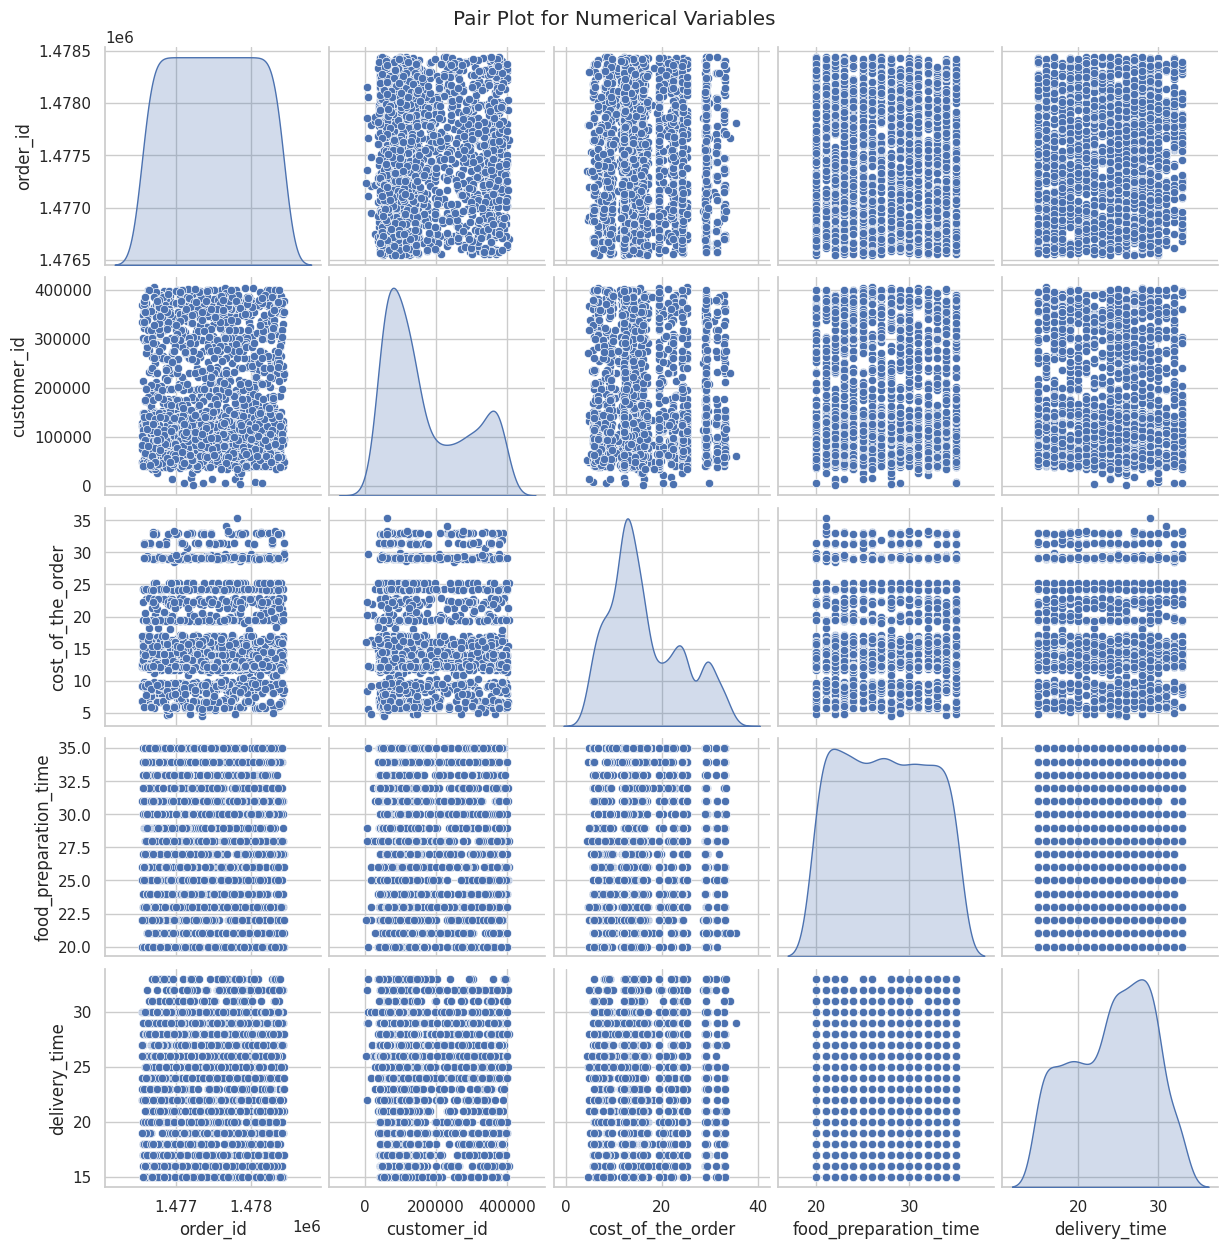

<ipython-input-21-29949066b7f4>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


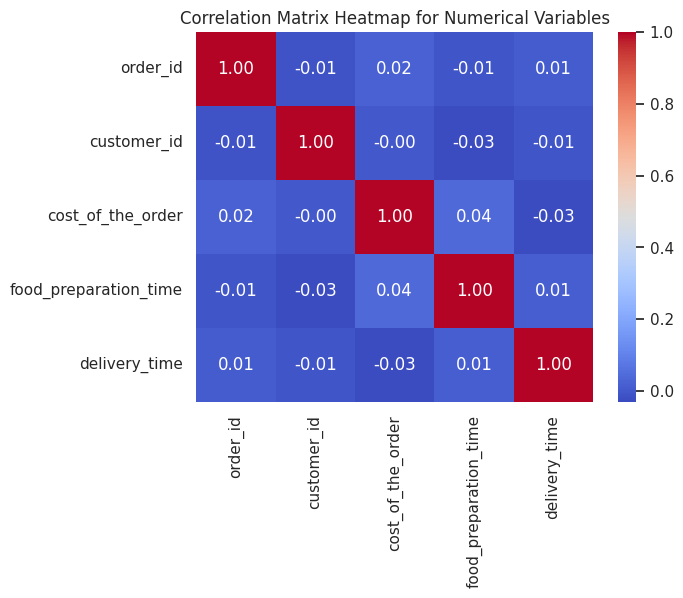

In [21]:
# Pairplot for numerical variables
sns.pairplot(df, diag_kind='kde')
plt.suptitle('Pair Plot for Numerical Variables', y=1)
plt.show()

# Heatmap for correlation matrix of numerical variables
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap for Numerical Variables')
plt.show()

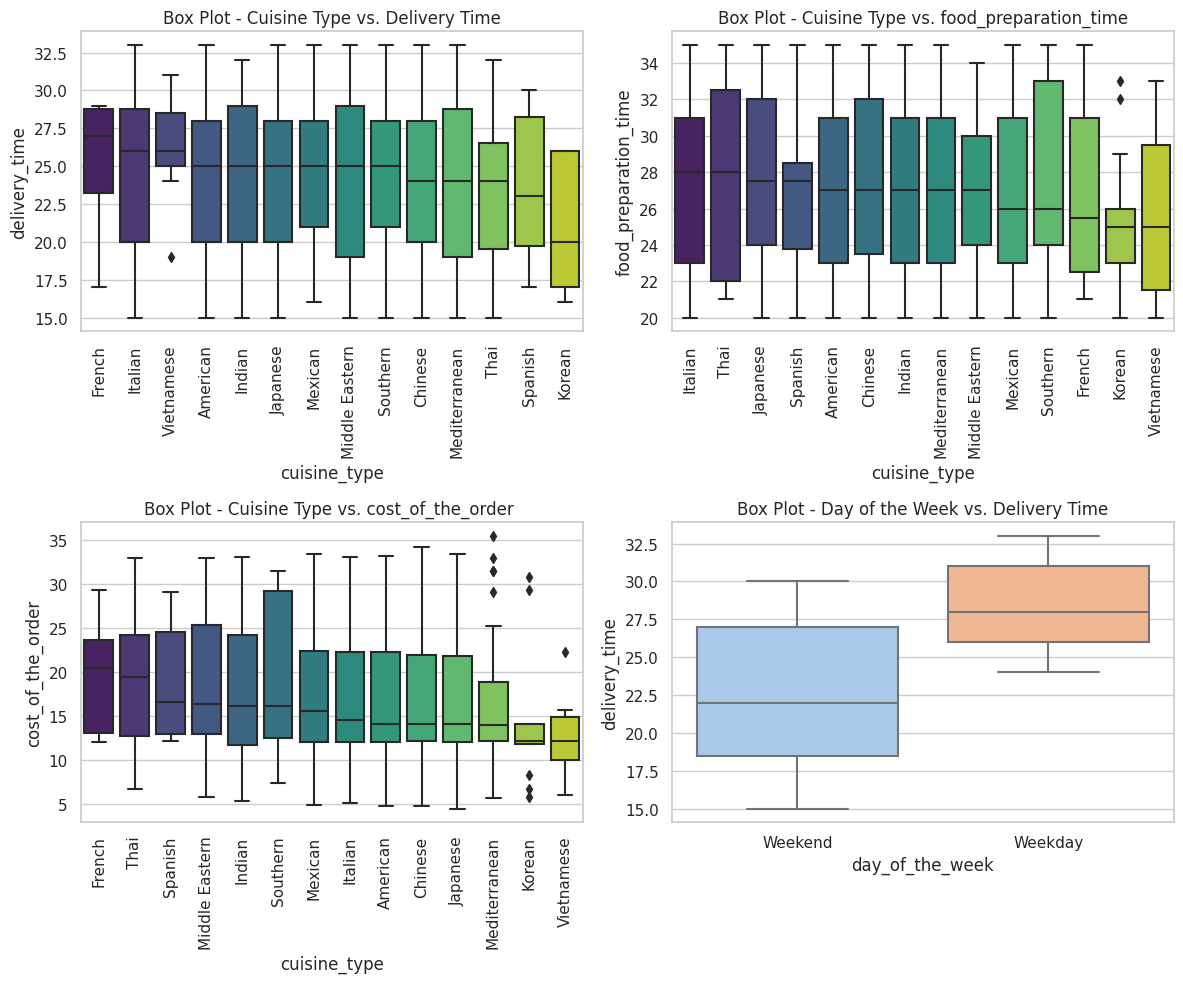

In [22]:
# Set up the figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

## Box plot: cuisine_type vs. delivery_time
# Calculate the mean delivery_time for each cuisine_type
mean_values = df.groupby('cuisine_type')['delivery_time'].median().sort_values(ascending=False)
# Create a list of cuisine types ordered by mean values
order_list = mean_values.index.tolist()
# Create the box plot with the specified order
sns.boxplot(x='cuisine_type', y='delivery_time', data=df, order=order_list, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Box Plot - Cuisine Type vs. Delivery Time')
axes[0, 0].tick_params(axis='x', rotation=90)

## Box plot: cuisine_type vs. ood_preparation_time
# Calculate the mean food_preparation_time for each cuisine_type
mean_values = df.groupby('cuisine_type')['food_preparation_time'].median().sort_values(ascending=False)
# Create a list of cuisine types ordered by mean values
order_list = mean_values.index.tolist()
# Create the box plot with the specified order
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df, order=order_list, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Box Plot - Cuisine Type vs. food_preparation_time')
axes[0, 1].tick_params(axis='x', rotation=90)

## Box plot: cuisine_type vs. cost_of_the_order
# Calculate the mean food_preparation_time for each cuisine_type
mean_values = df.groupby('cuisine_type')['cost_of_the_order'].median().sort_values(ascending=False)
# Create a list of cuisine types ordered by mean values
order_list = mean_values.index.tolist()
# Create the box plot with the specified order
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df, order=order_list, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Box Plot - Cuisine Type vs. cost_of_the_order ')
axes[1, 0].tick_params(axis='x', rotation=90)

# Box plot: day_of_the_week vs. delivery_time
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df, ax=axes[1, 1], palette='pastel')
axes[1, 1].set_title('Box Plot - Day of the Week vs. Delivery Time')

# Adjust layout
plt.tight_layout()
plt.show()

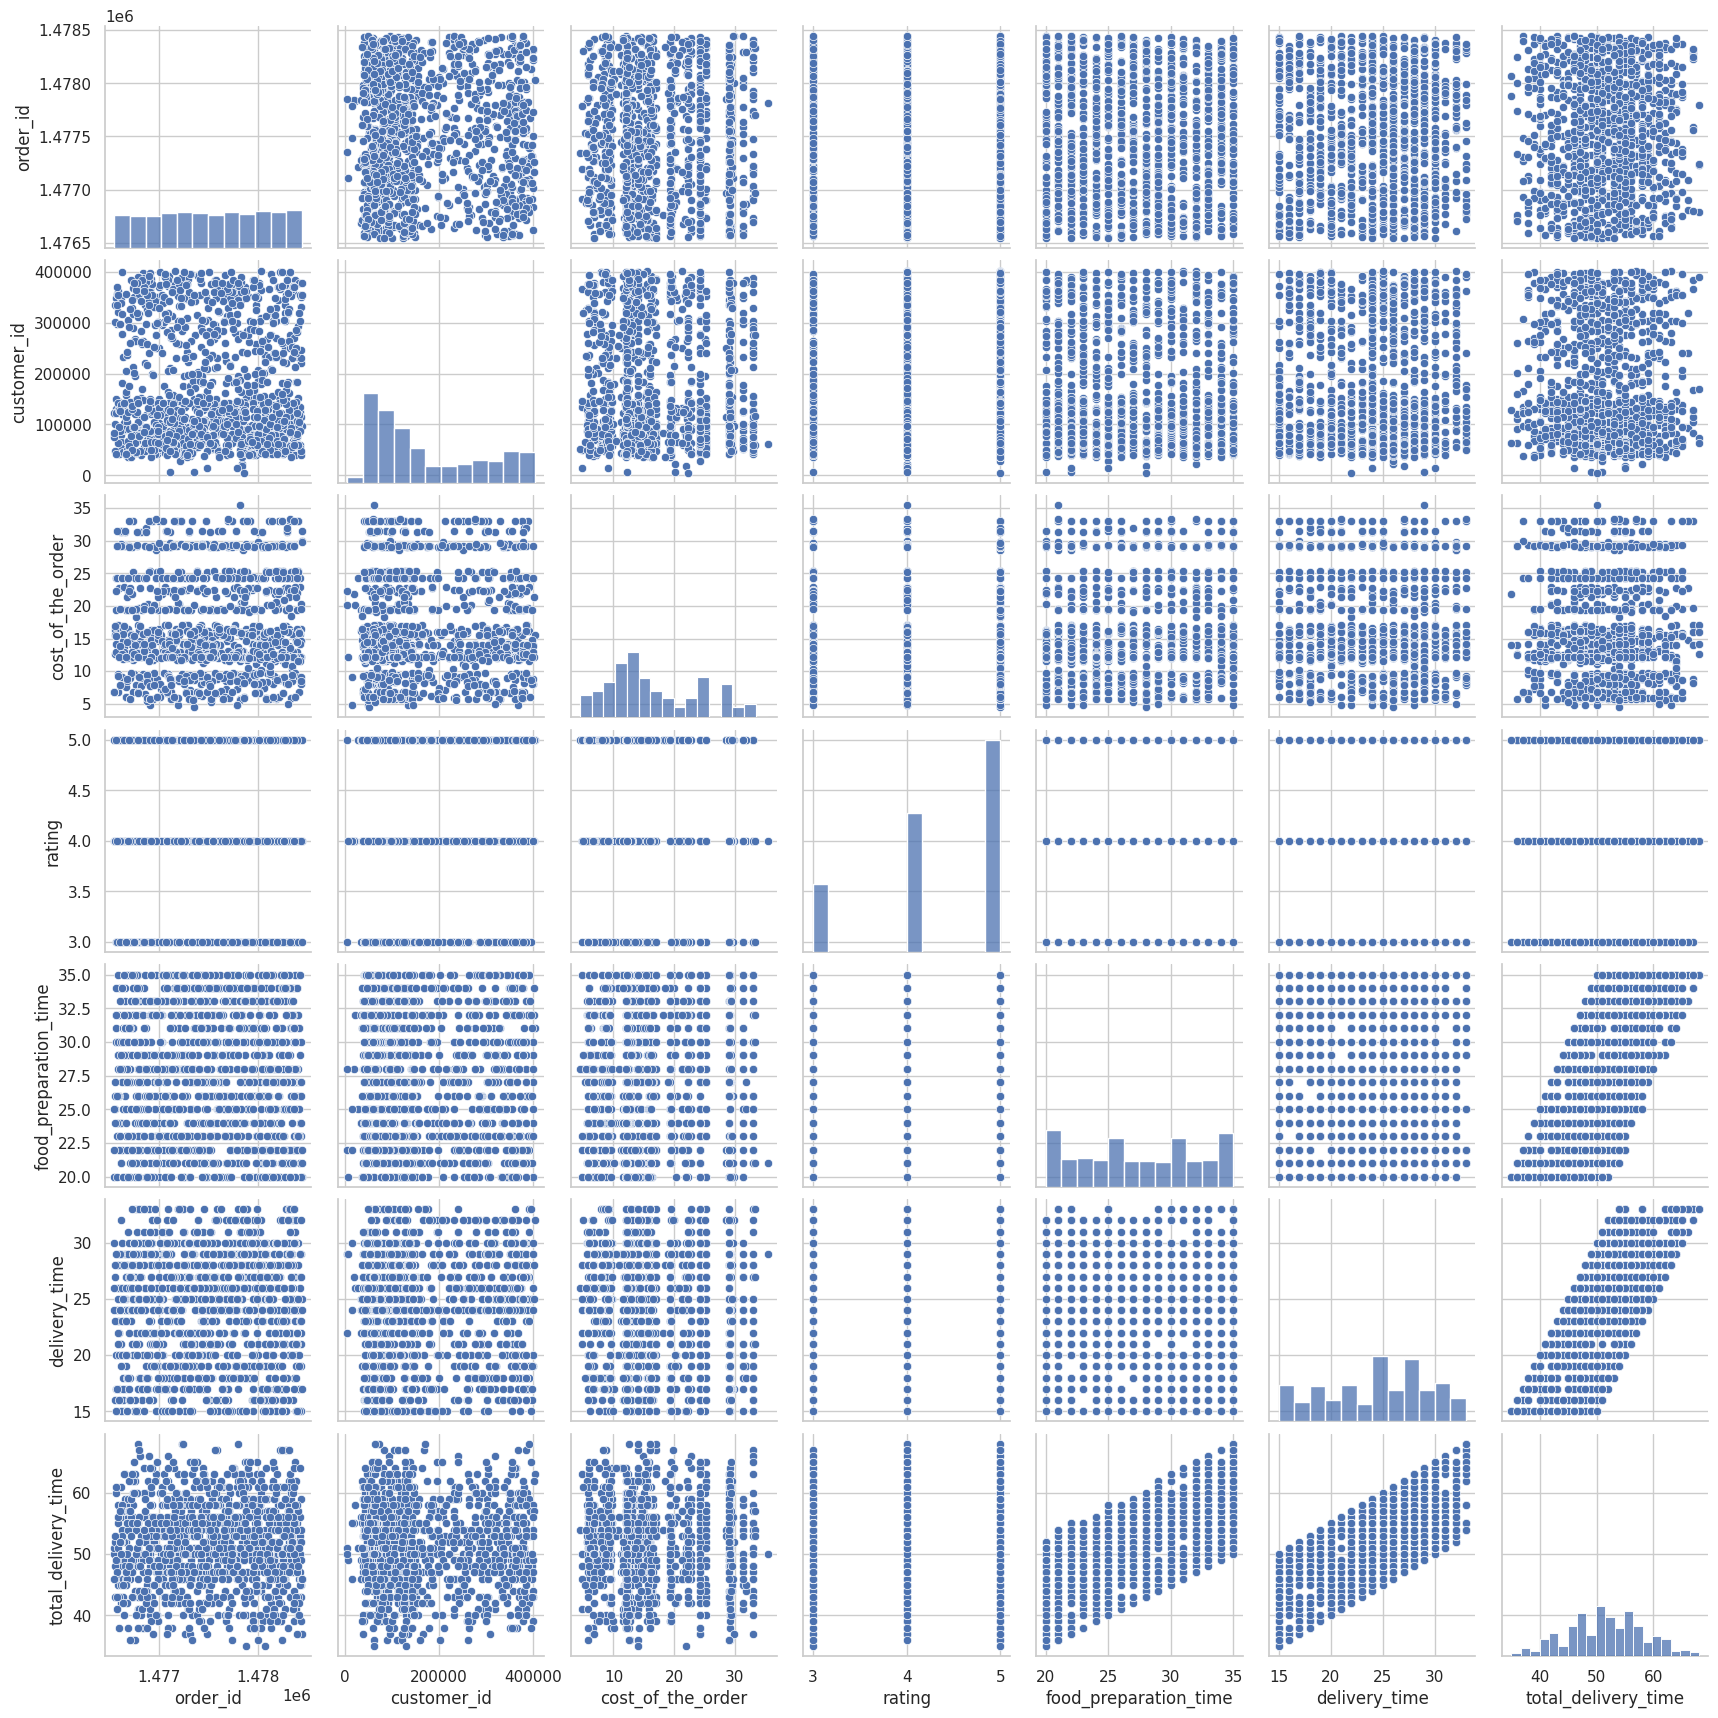

<ipython-input-23-7bfe70db4800>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_cleaned.corr()


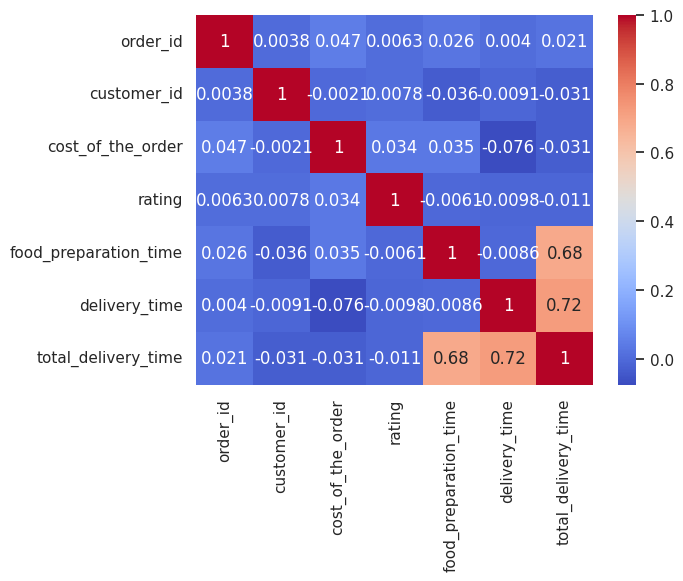

In [23]:
df_cleaned = df[df['rating'] != 'Not given'].copy()
df_cleaned['rating'] = df_cleaned['rating'].astype(int)
df_cleaned['total_delivery_time'] = df_cleaned['food_preparation_time'] + df_cleaned['delivery_time']

# Scatter plots for numerical variables
sns.pairplot(df_cleaned)
plt.show()

# Correlation heatmap for numerical variables
correlation_matrix = df_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Observations:
    
There are no significant features that can be analyzed from Pairplot or Heatmap (there is no significant difference when adding rating). From the boxplot, it can tell that French has a relatively high delivery time. It may be related to the geographical address. Italian restaurants have longer food preparation time, Korean restaurants have shorter food preparation time. In terms of cost, French restaurants have more expensive ones. In terms of delivery time, Weekend has a relatively low delivery time.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [24]:
# Preclean the rating data value
df_precleaned = df[df['rating'] != 'Not given'].copy()
df_precleaned['rating'] = df_cleaned['rating'].astype(int)

# Filter restaurants based on [rating count of more than 50 and the average rating should be greater than 4]
filtered_restaurants = df_precleaned.groupby('restaurant_name').filter(lambda x: x['rating'].count() > 50 and x['rating'].mean() > 4)

# Extract unique restaurant names
restaurants_with_promotional_offer = filtered_restaurants['restaurant_name'].unique()

# Display the result
print("Restaurants fulfilling the criteria for the promotional offer:")
print(restaurants_with_promotional_offer)

Restaurants fulfilling the criteria for the promotional offer:
['Blue Ribbon Fried Chicken' 'Shake Shack' 'Blue Ribbon Sushi'
 'The Meatball Shop']


#### Observations:
The restaurants fulfilling the criteria to get the promotional offer is as below.
The critia is that the rating more than 50 counts and the mean value of rating greater than 4.

1.Blue Ribbon Fried Chicken

2.Shake Shack

3.Blue Ribbon Sushi

4.The Meatball Shop

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [25]:
# Calculate the net revenue
def calculate_net_revenue(cost):
    if cost > 20:
        return (0.25 * cost)
    elif cost > 5:
        return (0.15 * cost)
    else:
        return 0

# Apply the function to the 'cost_of_the_order' column
df['net_revenue'] = df['cost_of_the_order'].apply(calculate_net_revenue)

# Calculate the total net revenue across all orders
total_net_revenue = df['net_revenue'].sum()

# Print the total net revenue
print(f'Total Net Revenue: ${total_net_revenue:.2f}')

Total Net Revenue: $6166.30


#### Observations:
The total net revenue generated by the company across all orders is $6,166.30

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [26]:
# Copy the dataset for this question and create the the [total_delivery_time] column
df_Q15 = df.copy()
df_Q15['total_delivery_time'] = df_Q15['food_preparation_time'] + df_Q15['delivery_time']

In [27]:
# Calculate the percentage of orders that take more than 60 minutes to deliver
orders_more_than_60_minutes = df_Q15[df_Q15['total_delivery_time'] > 60]
percentage_more_than_60_minutes = (len(orders_more_than_60_minutes) / len(df)) * 100

print(f"The percentage of orders taking more than 60 minutes to deliver is: {percentage_more_than_60_minutes:.2f}%")

The percentage of orders taking more than 60 minutes to deliver is: 10.54%


#### Observations:
About 10.54% of orders are delivered more than 60 minutes. Therefore, about 89.46% of orders are less than 60 minutes.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

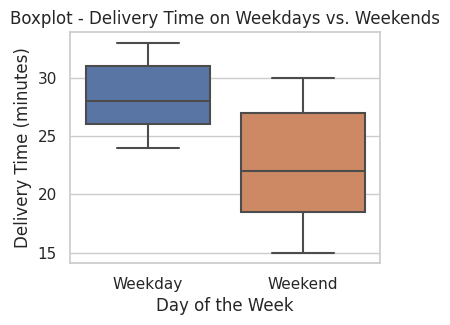

Mean Delivery Time:
day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64


In [28]:
# Categorical the 'day_of_the_week'
df['day_of_the_week'] = pd.Categorical(df['day_of_the_week'], categories=['Weekday', 'Weekend'], ordered=True)

# Boxplot to visualize the distribution of delivery time on weekdays and weekends
plt.figure(figsize=(4, 3))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)
plt.title('Boxplot - Delivery Time on Weekdays vs. Weekends')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time (minutes)')
plt.show()

# Calculate the mean delivery time on weekdays and weekends
mean_delivery_time_by_day = df.groupby('day_of_the_week')['delivery_time'].mean()
print("Mean Delivery Time:")
print(mean_delivery_time_by_day)

#### Observations:
According to the above chart and calculation results, the average delivery time of Weekday(28.34min) is longer than that of Weekend(22.47min). It is inferred that delivery on weekends is more efficient.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

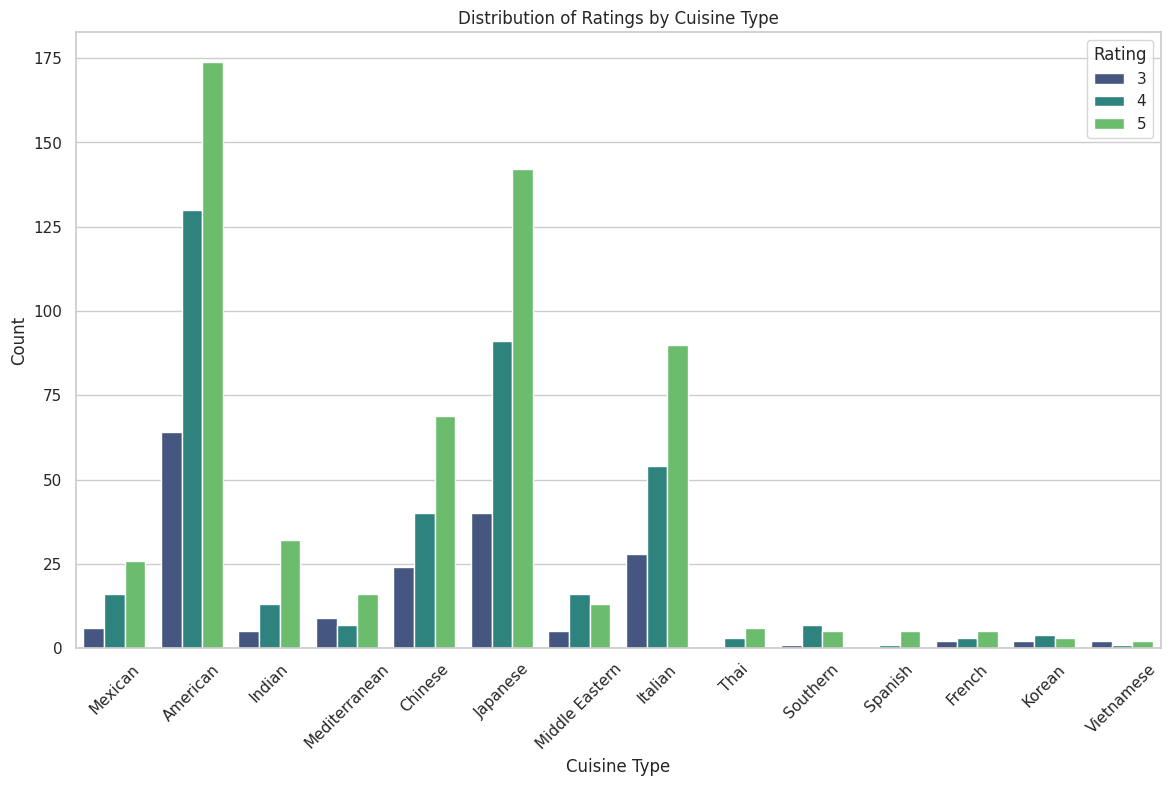

Average Ratings by Cuisine Type:
cuisine_type
Spanish           4.833333
Thai              4.666667
Indian            4.540000
Mexican           4.416667
Japanese          4.373626
Italian           4.360465
Chinese           4.338346
Southern          4.307692
French            4.300000
American          4.298913
Middle Eastern    4.235294
Mediterranean     4.218750
Korean            4.111111
Vietnamese        4.000000
Name: rating, dtype: float64


In [29]:
# Distribution of ratings by cuisine typea
plt.figure(figsize=(14, 8))
sns.countplot(x='cuisine_type', hue='rating', data=df_cleaned, palette='viridis')
plt.title('Distribution of Ratings by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Rating')
plt.show()

# Average ratings by cuisine type
avg_ratings_by_cuisine = df_cleaned.groupby('cuisine_type')['rating'].mean().sort_values(ascending=False)
print("Average Ratings by Cuisine Type:")
print(avg_ratings_by_cuisine)

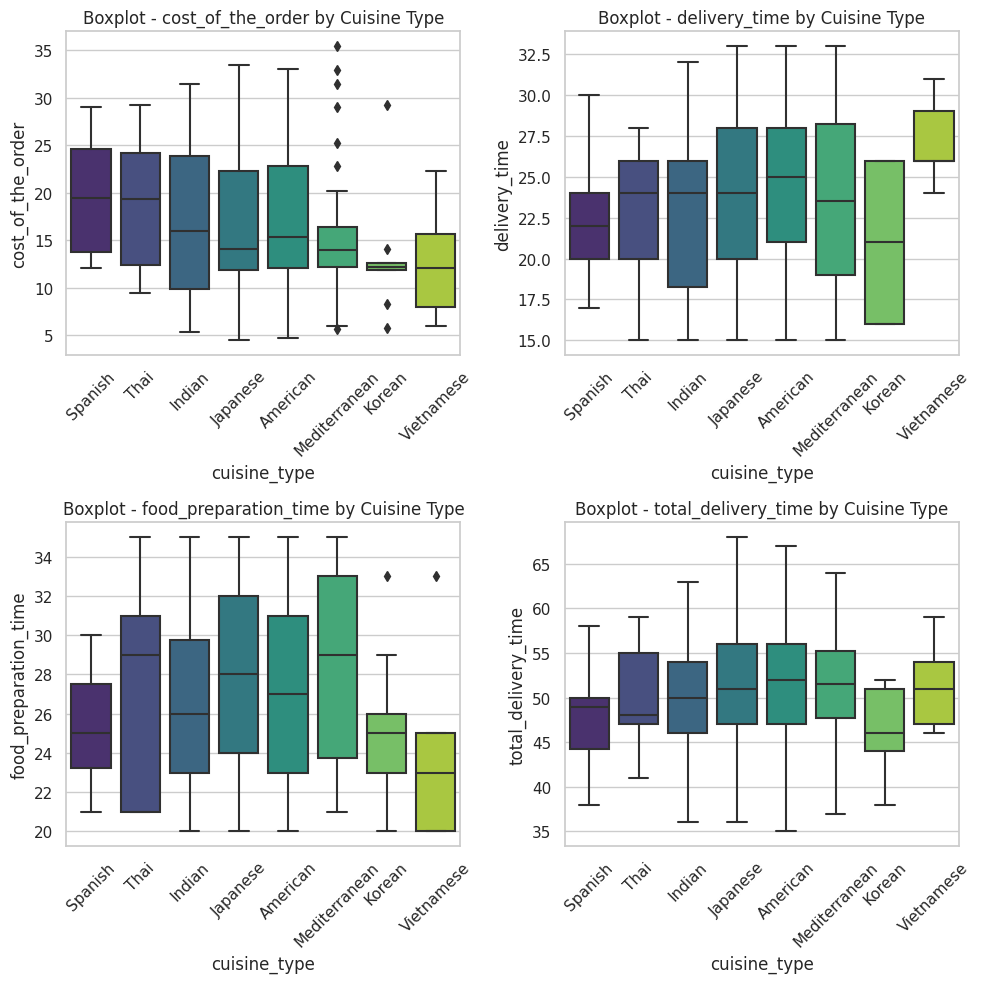

Summary Statistics for Selected Cuisine Types:
    cuisine_type  cost_of_the_order  delivery_time  food_preparation_time  \
5        Spanish          19.718333      22.500000              25.333333   
6           Thai          19.185556      23.000000              26.888889   
1         Indian          16.663400      23.300000              26.280000   
2       Japanese          16.345641      23.743590              27.652015   
0       American          16.812989      24.396739              27.388587   
4  Mediterranean          15.892500      23.187500              27.875000   
3         Korean          13.142222      21.111111              25.333333   
7     Vietnamese          12.806000      27.200000              24.200000   

   total_delivery_time    rating  
5            47.833333  4.833333  
6            49.888889  4.666667  
1            49.580000  4.540000  
2            51.395604  4.373626  
0            51.785326  4.298913  
4            51.062500  4.218750  
3            4

In [30]:
# alldata
# Filter for the specified cuisine types
selected_cuisines = ['Spanish', 'Thai', 'Indian', 'American', 'Japanese', 'Vietnamese', 'Korean', 'Mediterranean']
df_selected_cuisines = df_cleaned[df_cleaned['cuisine_type'].isin(selected_cuisines)]

# Boxplot for cost_of_the_order, delivery_time, food_preparation_time, and total_delivery_time by cuisine type
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

numerical_columns = ['cost_of_the_order', 'delivery_time', 'food_preparation_time', 'total_delivery_time']

# Sort cuisine types by mean rating in descending order
sorted_cuisine_types = df_selected_cuisines.groupby('cuisine_type')['rating'].mean().sort_values(ascending=False).index

for i, col in enumerate(numerical_columns):
    sns.boxplot(x='cuisine_type', y=col, data=df_selected_cuisines, ax=axes[i//2, i%2], palette='viridis', order=sorted_cuisine_types)
    axes[i//2, i%2].set_title(f'Boxplot - {col} by Cuisine Type')
    axes[i//2, i%2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Summary statistics for the selected cuisine types
summary_statistics = df_selected_cuisines.groupby('cuisine_type').agg({
    'cost_of_the_order': 'mean',
    'delivery_time': 'mean',
    'food_preparation_time': 'mean',
    'total_delivery_time': 'mean',
    'rating': 'mean'
}).reset_index()

# Sort by 'rating' in descending order
summary_statistics = summary_statistics.sort_values(by='rating', ascending=False)

print("Summary Statistics for Selected Cuisine Types:")
print(summary_statistics)

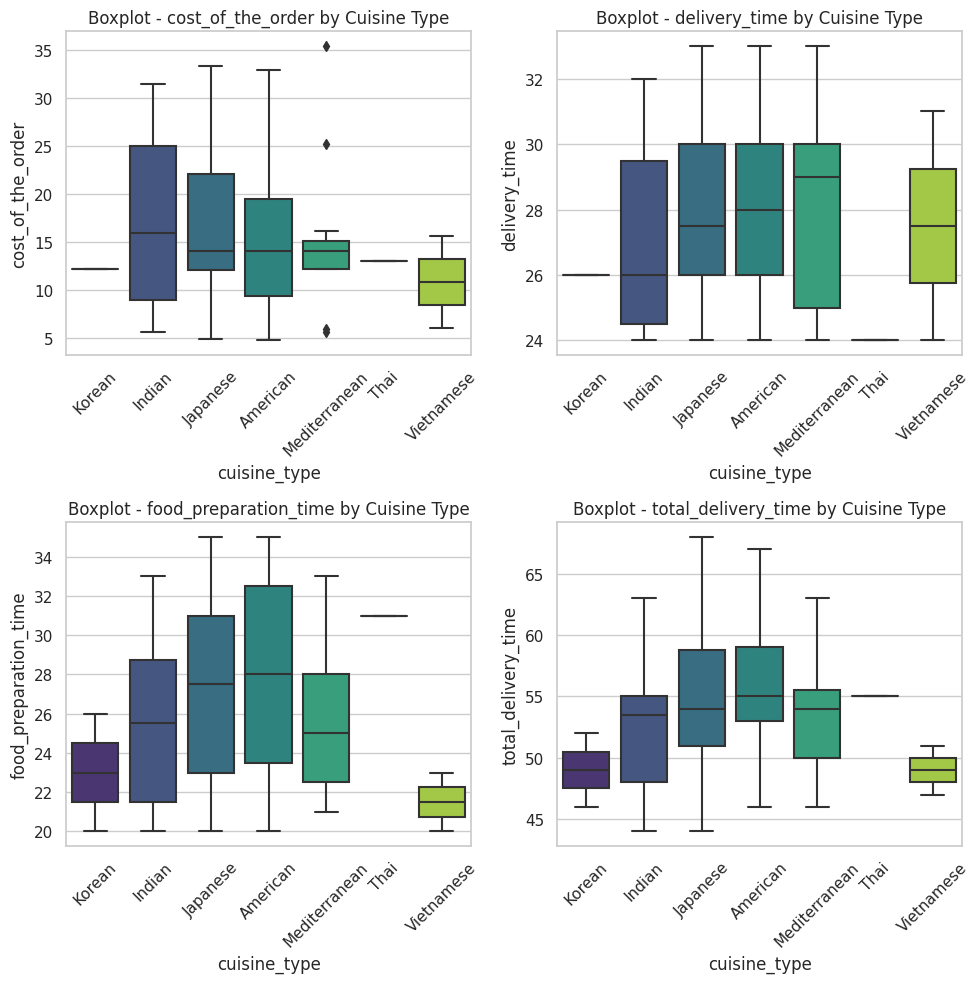

Summary Statistics for Selected Cuisine Types:
    cuisine_type  cost_of_the_order  delivery_time  food_preparation_time  \
3         Korean          12.180000      26.000000              23.000000   
1         Indian          17.312143      27.071429              25.500000   
2       Japanese          16.235811      27.932432              27.283784   
0       American          15.053153      28.198198              27.666667   
4  Mediterranean          15.267273      28.090909              25.636364   
5           Thai          13.050000      24.000000              31.000000   
6     Vietnamese          10.840000      27.500000              21.500000   

   total_delivery_time    rating  
3            49.000000  4.500000  
1            52.571429  4.428571  
2            55.216216  4.364865  
0            55.864865  4.252252  
4            53.727273  4.000000  
5            55.000000  4.000000  
6            49.000000  3.000000  


In [31]:
# Filter for weekday
df_cleaned_wd = df_cleaned[df_cleaned['day_of_the_week'] == 'Weekday'].copy()

# Filter for the specified cuisine types
selected_cuisines = ['Spanish', 'Thai', 'Indian', 'American', 'Japanese', 'Vietnamese', 'Korean', 'Mediterranean']
df_selected_cuisines = df_cleaned_wd[df_cleaned_wd['cuisine_type'].isin(selected_cuisines)]

# Boxplot for cost_of_the_order, delivery_time, food_preparation_time, and total_delivery_time by cuisine type
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

numerical_columns = ['cost_of_the_order', 'delivery_time', 'food_preparation_time', 'total_delivery_time']

# Sort cuisine types by mean rating in descending order
sorted_cuisine_types = df_selected_cuisines.groupby('cuisine_type')['rating'].mean().sort_values(ascending=False).index

for i, col in enumerate(numerical_columns):
    sns.boxplot(x='cuisine_type', y=col, data=df_selected_cuisines, ax=axes[i//2, i%2], palette='viridis', order=sorted_cuisine_types)
    axes[i//2, i%2].set_title(f'Boxplot - {col} by Cuisine Type')
    axes[i//2, i%2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Summary statistics for the selected cuisine types
summary_statistics = df_selected_cuisines.groupby('cuisine_type').agg({
    'cost_of_the_order': 'mean',
    'delivery_time': 'mean',
    'food_preparation_time': 'mean',
    'total_delivery_time': 'mean',
    'rating': 'mean'
}).reset_index()

# Sort by 'rating' in descending order
summary_statistics = summary_statistics.sort_values(by='rating', ascending=False)

print("Summary Statistics for Selected Cuisine Types:")
print(summary_statistics)

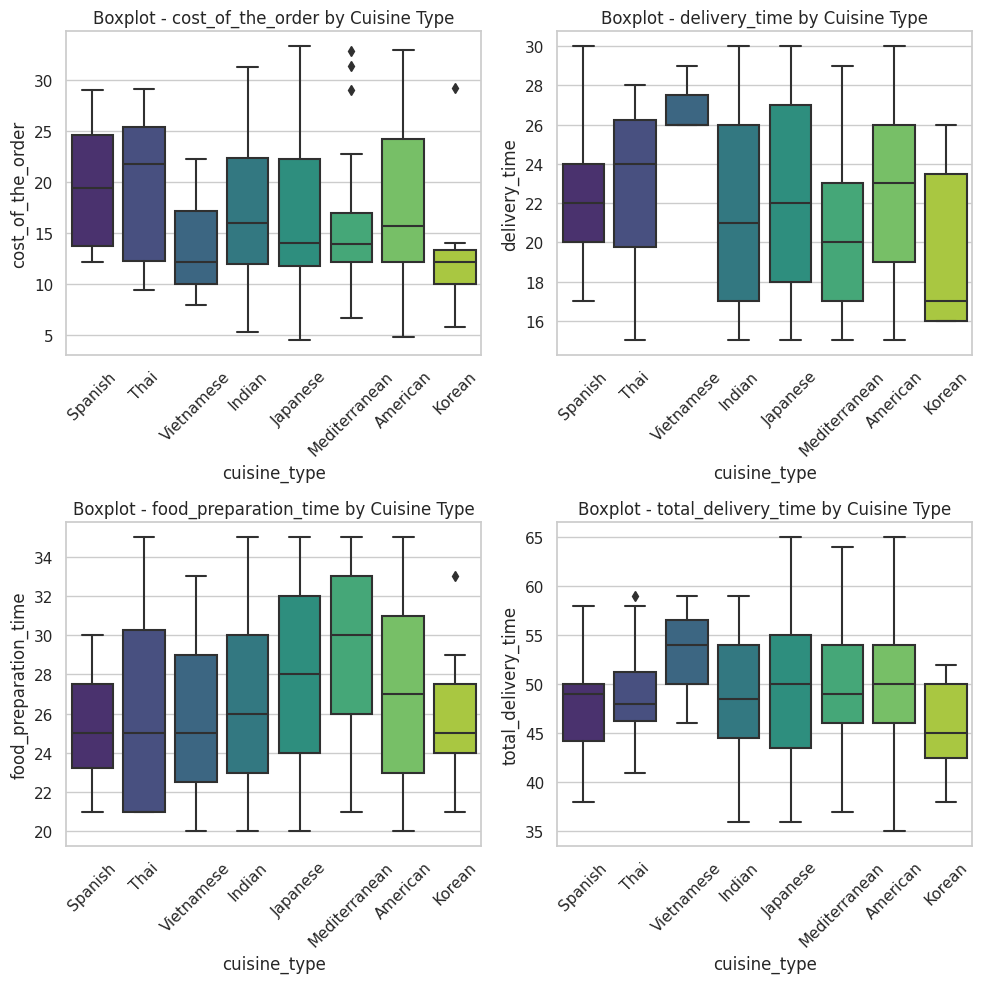

Summary Statistics for Selected Cuisine Types:
    cuisine_type  cost_of_the_order  delivery_time  food_preparation_time  \
5        Spanish          19.718333      22.500000              25.333333   
6           Thai          19.952500      22.875000              26.375000   
7     Vietnamese          14.116667      27.000000              26.000000   
1         Indian          16.411111      21.833333              26.583333   
2       Japanese          16.386482      22.185930              27.788945   
4  Mediterranean          16.220000      20.619048              29.047619   
0       American          17.573074      22.754864              27.268482   
3         Korean          13.417143      19.714286              26.000000   

   total_delivery_time    rating  
5            47.833333  4.833333  
6            49.250000  4.750000  
7            53.000000  4.666667  
1            48.416667  4.583333  
2            49.974874  4.376884  
4            49.666667  4.333333  
0            5

In [32]:
# Filter for weekend
df_cleaned_we = df_cleaned[df_cleaned['day_of_the_week'] == 'Weekend'].copy()

# Filter for the specified cuisine types
selected_cuisines = ['Spanish', 'Thai', 'Indian', 'American', 'Japanese', 'Vietnamese', 'Korean', 'Mediterranean']
df_selected_cuisines = df_cleaned_we[df_cleaned_we['cuisine_type'].isin(selected_cuisines)]

# Boxplot for cost_of_the_order, delivery_time, food_preparation_time, and total_delivery_time by cuisine type
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

numerical_columns = ['cost_of_the_order', 'delivery_time', 'food_preparation_time', 'total_delivery_time']

# Sort cuisine types by mean rating in descending order
sorted_cuisine_types = df_selected_cuisines.groupby('cuisine_type')['rating'].mean().sort_values(ascending=False).index

for i, col in enumerate(numerical_columns):
    sns.boxplot(x='cuisine_type', y=col, data=df_selected_cuisines, ax=axes[i//2, i%2], palette='viridis', order=sorted_cuisine_types)
    axes[i//2, i%2].set_title(f'Boxplot - {col} by Cuisine Type')
    axes[i//2, i%2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Summary statistics for the selected cuisine types
summary_statistics = df_selected_cuisines.groupby('cuisine_type').agg({
    'cost_of_the_order': 'mean',
    'delivery_time': 'mean',
    'food_preparation_time': 'mean',
    'total_delivery_time': 'mean',
    'rating': 'mean'
}).reset_index()

# Sort by 'rating' in descending order
summary_statistics = summary_statistics.sort_values(by='rating', ascending=False)

print("Summary Statistics for Selected Cuisine Types:")
print(summary_statistics)

### Conclusions:
*  
In summary, the analysis of the DataFrame with 1898 rows and 9 columns sheds light on customer orders and restaurant performance. Some data needs processing, like handling 'not given' ratings. The dataset has diverse data types but no missing values.
*
Key findings include 736 orders without ratings and some customers placing exceptionally high order frequencies. The average customer consumption is 16.49 yuan, and delivery time averages 24.16 minutes.
*
Specific insights reveal Shake Shack as the top-performing restaurant, American cuisine as the most popular, and better weekend sales. The top five restaurants by order count are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.
*
Around 10.54% of orders take more than 60 minutes for delivery, while 89.46% are within this timeframe. Notably, average delivery time on weekdays (28.34 minutes) exceeds weekends (22.47 minutes).
*
This analysis provides a clear picture of customer orders and restaurant performance.

### Recommendations:

*  From Cuisine Type Analysis:
If we want to increase sales, we should focus on American, Japanese, and Italian restaurants for promotions. It should significantly increase revenue.


* To enhance the Rating score, a tailored approach for weekdays and weekends is recommended. Examining the Boxplot, ordered by rating, reveals distinct strategies for each.

* On weekdays, elevating the rating involves reducing food delivery and preparation time. This approach proves effective, likely because people on weekdays are constrained by work schedules and prefer quicker, more affordable meals, particularly of Korean and Indonesian cuisines.

* Conversely, weekends present a different scenario. Analysis indicates a preference for meals with longer preparation times. To boost the rating on weekends, the focus should shift towards minimizing delivery time, with less emphasis on meal prices.

* In conclusion, the key suggestion is to improve the rating by shortening delivery times. Implementing promotions targeted at specific meal types on weekdays and weekends can be a strategic approach. For instance, promotions on Korean and Indonesian dishes during weekdays and featuring Spanish and Thai options on weekends could prove effective in garnering higher ratings.

---